## Онлайн хакатон. P&G. Выполнил Славный Богдан
E-mail: slavnyi.bogdan@gmail.com

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
%config Completer.use_jedi = False

## Задание 1. Проверка данных на полноту

На первом шаге в качестве Data Analyst компании P&G тебе предстоит 
научиться определять полноту исходных данных.
Утром ты получил письмо от руководителя с инструкцией по выполнению 
задания.  


Привет!  
Нам нужно проанализировать данные истории покупок. Сейчас планируем запуск проекта по 
работе с отсканированными чеками покупателей, которые те загружают для получения 
кэшбэка и призов по программе лояльности «Кэшбэк 10 %». 
Мы хотим исследовать данные отсканированных чеков на предмет полноты (дата-сет 
прикреплен во вложении), то есть посчитать количество строк, содержащих пустые или 
пропущенные значения, которые обозначаются как NaN2 и вывести их долю в процентах от 
общего количества строк в файле.    


Hints. При работе с большими дата-сетами удобно пользоваться Python. Ниже представлен 
код, который поможет тебе прочитать файл:  
df = pd.read_csv('Case Data.csv', sep=",")  
print(df)    


Твоя задача дополнить код так, чтобы он посчитал и напечатал количество строк с NaNзначениями, а также указал в каких столбцах содержится больше всего пустых строк. Для 
этого используй метод isna() (isnull для версии pandas < 0.21.0). Для подсчета общего 
числа строк и столбцов можешь воспользоваться методом df.shape.
Оставь несколько строк комментариев в файле кода о том, какие столбцы содержат больше 
всего NaN-значений.
Наша IT-команда очень рассчитывает на тебя.

In [4]:
df = pd.read_csv('Case Data.csv')

In [5]:
df.head(2)

﻿id чека      Дата и время         ИНН  \
0  0000a622f9c8f1821ca549fbcfd47405  21.12.2019 15:15  2310031475   
1  0000a622f9c8f1821ca549fbcfd47405  21.12.2019 15:15  2310031475   

                     IDПользователя  \
0  2700449a73d4cb9d8e909c706bf16fbe   
1  2700449a73d4cb9d8e909c706bf16fbe   

                                              Товар     Бренд  \
0  libresse natural care ultra прокладки normal 10ш  libresse   
1  pampers трусики-подг 5 junior 12-17/15-18кг 96шт   pampers   

                                            Теги    Цена  Кол-во   Сумма  \
0  личная гигиена; красота и здоровье; прокладки    63.2     2.0   126.4   
1                                            NaN  1549.0     1.0  1549.0   

   Кэшбэк  
0     NaN  
1   154.9

In [6]:
df.shape

(309707, 11)

In [7]:
# Переименуем колонки для более удобной навигации (чтобы было 1 слово, которое можно легко выделить двойным щелчком)
df = df.rename(columns={'﻿id чека': 'check_id', 'Дата и время': 'datetime', 'ИНН': 'inn', 'IDПользователя': 'customer_id',
                  'Товар': 'product_name', 'Бренд': 'brand', 'Теги': 'tags', 'Цена': 'price', 'Кол-во': 'quantity',
                  'Сумма': 'total_sales', 'Кэшбэк': 'cashback'})

In [8]:
# Переводим колонку в формат "datetime"
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
# Кол-во пропущенных значений
df.isna().sum()

check_id             0
datetime             0
inn                  0
customer_id          0
product_name         0
brand           178495
tags            128391
price               52
quantity            52
total_sales         52
cashback        253552
dtype: int64

In [10]:
# Процент пропущенных значений
df.isna().sum() / df.shape[0] * 100

check_id         0.000000
datetime         0.000000
inn              0.000000
customer_id      0.000000
product_name     0.000000
brand           57.633505
tags            41.455634
price            0.016790
quantity         0.016790
total_sales      0.016790
cashback        81.868347
dtype: float64

In [11]:
df.shape

(309707, 11)

In [12]:
# У нас есть знак "; " в тегах, что эквивалентно "NaN" значениям.
df.query('tags == "; "').head(3)

check_id            datetime         inn  \
50  00036ba1eec6bddcbaf0fa19d36eac4c 2020-01-25 09:49:00  2310031475   
54  00036ba1eec6bddcbaf0fa19d36eac4c 2020-01-25 09:49:00  2310031475   
55  00036ba1eec6bddcbaf0fa19d36eac4c 2020-01-25 09:49:00  2310031475   

                         customer_id                          product_name  \
50  594d76aa83fd5501fdf12006d3356d29  aura ватные палочки classic эконом 4   
54  594d76aa83fd5501fdf12006d3356d29  raid антимоль подвеска весен цвет 4ш   
55  594d76aa83fd5501fdf12006d3356d29  контейнер 0,8л д/пищ. прод.(спецторг   

   brand tags  price  quantity  total_sales  cashback  
50  aura   ;    55.0       2.0        110.0       NaN  
54   NaN   ;    71.2       1.0         71.2       NaN  
55   NaN   ;    76.3       1.0         76.3       NaN

In [13]:
# Приравняем ";" к NaN
print(df['tags'].str.strip().replace(';', np.nan).isna().sum())
print(df['tags'].str.strip().replace(';', np.nan).isna().sum() / df.shape[0] * 100)

130598
42.16824288763251


## Ответ на задание 1
Больше всего NA значений содержат такие колонки как "cashback" - 253 552, "brand" - 178 495 , "tags" - 130 598 значений. Что составляет 81.9%, 57.6% и 42.2% пустых строк соответственно.

## Задание 2. Поиск ассоциативных правил

После успешного завершения анализа исходных данных на полноту, тебе 
нужно разобраться с применением Python для составления ассоциативных 
правил.    

На почте ты обнаружил новое письмо от IT-команды с постановкой 
очередного задания.  

Привет!  

В качестве второго задания в роли Data Analyst предлагаем тебе познакомиться с 
ассоциативными правилами.  

**Обучение ассоциативным правилам**, или **Associations Rules Learning (ARL)** происходит на 
базе правил, помогающих обнаруживать взаимосвязи между транзакциями покупателей по 
данным истории покупок. В ARL анализируются чеки отдельных потребителей и выявляются 
правила взаимосвязей. Например, если 80% покупателей, имеющих в чеке пиццу, берут и 
зубные щетки, то получается следующее правило: «Покупка пиццы является условием для 
приобретения зубных щеток». При этом 80% — наша уверенность в правиле. Но бывает 
полезно учитывать не только confidence, но и поддержку. Поддержка — это доля 
покупателей, которые взяли вместе пиццу и зубные щетки, от общего числа клиентов. 

Hints. Для ARL в Python есть библиотека efficient_apriori. Если импортировать оттуда 
Apriori алгоритм3, то можно научиться составлять базовые правила. Прежде чем применить 
apriori на Python, нужно заполнить NaN-значения с помощью метода fillna, а затем 
сгруппировать теги только для уникальных ID чеков (обрати внимание на groupby). 
После этого нужно сформировать лист из сгруппированных значений, используя 
list(map(tuple, сгруппированные_значения)). Наконец, можно обращаться к apriori, однако 
функция просит указать минимальное значение поддержки и уверенности. Пробуй различные 
значения для min_support. Помни, что если поддержка высокая, то вероятно речь идет об 
очевидном правиле. Такие не всегда интересны аналитикам, так как они общеизвестны.   

Слишком низкая поддержка свидетельствует о нехватке данных для проведения 
статистического анализа, поэтому правила с низкой поддержкой тоже редко используются.   
Также не забудь напечатать lift, support, confidence для одного правила, используя цикл 
с for и print.  
Как обычно ждем код с выполненным заданием, где ты должен оставить комментарии по 
выбранным значениям поддержки и уверенности.  
Спасибо!  

In [14]:
from efficient_apriori import apriori

In [15]:
df['tags'].nunique()

10149

In [16]:
# У нас 42.2% пропусков в тегах (что довольно много). Поэтому попытаемся их дополнить. 
# Если теги содержат NaN значения, сперва попытаемся заполнить их брендом, 
# поскольку бренд может ассоциироваться с отдельной группой товаров.

df['tags_clean'] = df['tags'].fillna(df['brand']).fillna('0').str.strip().replace(';', '0')

In [17]:
# данной обработкой я снизил процент пропусков с 42.2% до 36.8%
df['tags_clean'].replace('0', np.nan).isna().sum() / df.shape[0] * 100

36.766363046363175

In [18]:
# Процент пропусков все еще достаточно высокий. Пропробуем еще дополнить теги.
# Полное наименование товара написано на русском.
# Обычно бренды называют на английском. Попробуем в названии товара выбрать первое, целиком написанное на латинице слово.
# Скорее всего оно и будет брендом
alphabet = 'abcdefghijklmnopqrstuvwxyz'

def check_english_words(string):
    product_list = string.split(' ')
    product_list = [i.strip() for i in product_list]
    for word in product_list:
        count_english = 0
        for letter in word:
            if letter.lower() in alphabet:
                count_english += 1
                if len(word) == count_english:
                    return word
    return np.nan

df['tags_clean'] = df['tags_clean'].replace('0', np.nan) \
                                    .fillna(df['product_name'].apply(check_english_words)) \
                                    .replace(np.nan, '0')

In [19]:
# Процент пропусков в тегах снизился еще с 36.8% до 27%
df['tags_clean'].replace('0', np.nan).isna().sum() / df.shape[0] * 100

26.94805089972135

In [20]:
# У нас есть перемешанные теги (одни и те же теги могут быть по-разному упорядочены). 
# Для Python список одних и тех же значений, но в разном порядке - это 2 разных списка.
# Упорядочим их в алфавитном порядке
def sort_tags(tags):
    tags = [i.strip() for i in tags.split(';')]
    tags.sort()
    tags = '; '.join(tags)
    
    return tags
    
df['tags_clean'] = df['tags_clean'].apply(sort_tags)

In [21]:
# При чем кол-во уникальных значений относительно невелико и равняется 5405.
df['tags_clean'].nunique()

5405

In [22]:
# Поскольку мы делаем анализ для программы лояльности кешбека, уберем из датасета упаковку в виде пакетов, которая
# есть во многих чеках и только мешает. 
grp_tags = df.query('tags_clean != "0" and tags_clean != "пакеты; прочее; упаковка"').groupby('check_id') \
    .agg({'tags_clean': 'unique'})

In [23]:
# Переберем коеффициенты и посмотрим, какие результаты выдает модель при разных значениях коеффициентов
min_support_list = np.arange(0.01, 1.0, 0.05)
min_confidence_list = np.arange(0.01, 1.0, 0.05)

transactions = list(map(tuple, grp_tags['tags_clean']))

count = 0
for support in min_support_list:
    for confidence in min_confidence_list:
        itemsets, rules = apriori(transactions, min_support=support, min_confidence=confidence)
        if len(rules) > 0:
            print(support, confidence, rules)
            print()
            print()
        count += 1
        if count % 100 == 0:
            print(count)

0.01 0.01 [{красота и здоровье; личная гигиена; прокладки} -> {бумага/салфетки; салфетки; хозяйственные товары}, {бумага/салфетки; салфетки; хозяйственные товары} -> {красота и здоровье; личная гигиена; прокладки}, {дезодорант/антиперсперант; красота и здоровье; личная гигиена} -> {гигиена волос; красота и здоровье; шампунь для волос}, {гигиена волос; красота и здоровье; шампунь для волос} -> {дезодорант/антиперсперант; красота и здоровье; личная гигиена}, {зубная паста; красота и здоровье; уход за полостью рта} -> {гигиена волос; красота и здоровье; шампунь для волос}, {гигиена волос; красота и здоровье; шампунь для волос} -> {зубная паста; красота и здоровье; уход за полостью рта}, {красота и здоровье; личная гигиена; прокладки} -> {гигиена волос; красота и здоровье; шампунь для волос}, {гигиена волос; красота и здоровье; шампунь для волос} -> {красота и здоровье; личная гигиена; прокладки}, {красота и здоровье; личная гигиена; прокладки} -> {дезодорант/антиперсперант; красота и здор

0.01 0.26 [{бумага/салфетки; салфетки; хозяйственные товары} -> {красота и здоровье; личная гигиена; прокладки}, {гель для душа; красота и здоровье; личная гигиена} -> {гигиена волос; красота и здоровье; шампунь для волос}, {кондитерские изделия; конфеты; продукты; хлеб и сладости} -> {красота и здоровье; личная гигиена; прокладки}, {куриное; молоко/сыр/яйца; продукты; яйцо} -> {красота и здоровье; личная гигиена; прокладки}, {бальзам для волос; гигиена волос; красота и здоровье} -> {гигиена волос; красота и здоровье; шампунь для волос}, {продукты; хлеб; хлеб и сладости} -> {красота и здоровье; личная гигиена; прокладки}, {банан; овощи/фрукты/ягоды; продукты; фрукты} -> {красота и здоровье; личная гигиена; прокладки}]


0.01 0.31000000000000005 [{бумага/салфетки; салфетки; хозяйственные товары} -> {красота и здоровье; личная гигиена; прокладки}, {гель для душа; красота и здоровье; личная гигиена} -> {гигиена волос; красота и здоровье; шампунь для волос}, {бальзам для волос; гигиена вол

In [24]:
# Мы видим, что для того, чтобы повысить min_confidence, нам приходится существенно снижать min_support
# Снизим min_support до 0.003, чтобы получить большее кол-во сопутствующих товаров с довольно высоким значением уверенности.

transactions = list(map(tuple, grp_tags['tags_clean']))
itemsets, rules = apriori(transactions, min_support=0.003, min_confidence=0.35)

In [25]:
for rule in rules:
    print(rule)
    print()

{soft} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.392, supp: 0.008, lift: 1.781, conv: 1.282)

{зубная щетка; красота и здоровье; уход за полостью рта} -> {зубная паста; красота и здоровье; уход за полостью рта} (conf: 0.379, supp: 0.007, lift: 5.001, conv: 1.489)

{бумага/салфетки; салфетки; хозяйственные товары} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.351, supp: 0.014, lift: 1.595, conv: 1.202)

{красота и здоровье; личная гигиена; салфетки влажные} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.406, supp: 0.008, lift: 1.844, conv: 1.312)

{горошек; консервы; овощные; продукты} -> {консервы; кукуруза; овощные; продукты} (conf: 0.353, supp: 0.003, lift: 36.447, conv: 1.530)

{овощи; овощи/фрукты/ягоды; перец; продукты} -> {овощи; овощи/фрукты/ягоды; огурцы; продукты} (conf: 0.371, supp: 0.003, lift: 15.926, conv: 1.552)

{овощи; овощи/фрукты/ягоды; продукты; томаты} -> {овощи; овощи/фрукты/ягоды; огурцы; продукты} (conf: 0.406, supp: 0

## Ответ на задание 2  

Итак, пойдем по порядку:  
1. **{soft} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.392, supp: 0.008, lift: 1.781, conv: 1.282)**  
Если отфильтровать продажи по тегу "soft", этот бренд производит ватные палочки, бумажные салфетки и полотенца. 
С "soft" в 39.2% случаев у нас также берут прокладки. При чем вероятность взять прокладки вырастает в 1,78 раз когда берут ватные палочки, бумажные салфетки и полотенца бренда "soft".  


2. **{зубная щетка; красота и здоровье; уход за полостью рта} -> {зубная паста; красота и здоровье; уход за полостью рта} (conf: 0.379, supp: 0.007, lift: 5.001, conv: 1.489)**  
С зубной щеткой в 37,9% случаев у нас также берут зубную пасту. При чем вероятность взять зубную пасту вырастает в 5 раз когда берут зубную щетку.


3. **{бумага/салфетки; салфетки; хозяйственные товары} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.351, supp: 0.014, lift: 1.595, conv: 1.202)**  
С салфетками в 35,1% случаев у нас также берут прокладки. При чем вероятность взять прокладки вырастает в 1,6 раз когда берут салфетки.


4. **{красота и здоровье; личная гигиена; салфетки влажные} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.406, supp: 0.008, lift: 1.844, conv: 1.312)**  
С влажными салфетками в 40,6% случаев у нас также берут прокладки. При чем вероятность взять прокладки вырастает в 1,8 раз когда берут влажные салфетки.  


5. **{горошек; консервы; овощные; продукты} -> {консервы; кукуруза; овощные; продукты} (conf: 0.353, supp: 0.003, lift: 36.447, conv: 1.530)**  
С горошком в 35,3% случаев у нас также берут кукурузу. При чем вероятность взять кукурузу вырастает в 36,4 раза когда берут горошек.   


6. **{овощи; овощи/фрукты/ягоды; перец; продукты} -> {овощи; овощи/фрукты/ягоды; огурцы; продукты} (conf: 0.371, supp: 0.003, lift: 15.926, conv: 1.552)**  
С перцем в 37,1% случаев у нас также берут огурцы. При чем вероятность взять огурцы вырастает в 16 раз когда берут перец. 


7. **{овощи; овощи/фрукты/ягоды; продукты; томаты} -> {овощи; овощи/фрукты/ягоды; огурцы; продукты} (conf: 0.406, supp: 0.009, lift: 17.435, conv: 1.643)**  
С томатами в 40,6% случаев у нас также берут огурцы. При чем вероятность взять огурцы вырастает в 17,4 раза когда берут томаты.


8. **{овощи; овощи/фрукты/ягоды; огурцы; продукты} -> {овощи; овощи/фрукты/ягоды; продукты; томаты} (conf: 0.406, supp: 0.009, lift: 17.435, conv: 1.645)**  
С огурцами в 40,6% случаев у нас также берут томаты. При чем вероятность взять томаты вырастает в 17,4 раза когда берут огурцы.


9. **{овощи; овощи/фрукты/ягоды; перец; продукты} -> {овощи; овощи/фрукты/ягоды; продукты; томаты} (conf: 0.359, supp: 0.003, lift: 15.386, conv: 1.523)**  
С перцем в 35,9% случаев у нас также берут томаты. При чем вероятность взять томаты вырастает в 15,4 раза когда берут перец.


10. **{dove} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.360, supp: 0.003, lift: 1.635, conv: 1.218)**  
С товарами марки dove(мыло, гель для душа) в 36% случаев у нас также берут прокладки. При чем вероятность взять прокладки вырастает в 1,6 раза когда берут товары марки dove.  


11. **{бальзам для волос; гигиена волос; красота и здоровье} -> {гигиена волос; красота и здоровье; шампунь для волос} (conf: 0.437, supp: 0.014, lift: 3.587, conv: 1.559)**  
С бальзамом для волос в 43,7% случаев у нас также берут шампунь для волос. При чем вероятность взять шампунь для волос вырастает в 3,6 раза когда берут бальзам для волос. 


12. **{3.2%; молоко; молоко/сыр/яйца; продукты} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.357, supp: 0.004, lift: 1.625, conv: 1.214)**  
С 3,2% молоком в 35,7% случаев у нас также берут прокладки. При чем вероятность взять прокладки вырастает в 1,6 раза когда берут молоко.


13. **{2.5%; молоко; молоко/сыр/яйца; продукты} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.371, supp: 0.004, lift: 1.689, conv: 1.241)**  
С 2.5% молоком в 37,1% случаев у нас также берут прокладки. При чем вероятность взять прокладки вырастает в 1,7 раза когда берут 2.5% молоко.


14. **{корм; корм для кошек; товары для животных} -> {влажный корм для кошек; корм; корм для кошек; товары для животных} (conf: 0.402, supp: 0.005, lift: 13.134, conv: 1.621)** 
С кормом для кошек в 40,2% случаев у нас также берут влажный корм для кошек. При чем вероятность взять влажный корм для кошек вырастает в 13 раз когда берут корм для кошек. 


15. **{365 дней} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.464, supp: 0.004, lift: 2.111, conv: 1.456)**  
С товарами торговой марки "365 дней" в 46,4% случаев у нас также берут прокладки. При чем вероятность взять прокладки вырастает в 2,1 раза когда берут товары торговой марки "365 дней".  


16. **{молоко/сыр/яйца; продукты; сырок} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.364, supp: 0.003, lift: 1.654, conv: 1.226)**  
С сырком в 36,4% случаев у нас также берут прокладки. При чем вероятность взять прокладки вырастает в 1,7 раз когда берут сырок.  


17. **{bella} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.403, supp: 0.003, lift: 1.834, conv: 1.307)**
С товарами торговой марки "bella" в 40.3% случаев у нас также берут прокладки. При чем вероятность взять прокладки вырастает в 1.8 раза когда берут товары торговой марки "bella".  


18. **{красота и здоровье; личная гигиена; тампоны} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.512, supp: 0.007, lift: 2.327, conv: 1.598)**
С тампонами в 51.2% случаев у нас также берут прокладки. При чем вероятность взять прокладки вырастает в 2.3 раз когда берут тампоны.  


19. **{лента} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.421, supp: 0.004, lift: 1.917, conv: 1.348)**  
С товарами торговой марки "лента" в 42.1% случаев у нас также берут прокладки. При чем вероятность взять прокладки вырастает в 1.9 раза когда берут товары торговой марки "лента".  


20. **{дезодорант/антиперсперант; красота и здоровье; личная гигиена, зубная паста; красота и здоровье; уход за полостью рта} -> {гигиена волос; красота и здоровье; шампунь для волос} (conf: 0.356, supp: 0.003, lift: 2.923, conv: 1.363)**  
С дезодорантом в 35,6% случаев у нас также берут шампунь. При чем вероятность взять шампунь вырастает в 2.9 раза когда берут дезодорант.  


## Задание 3

In [26]:
# Найдем бренды в датасете, которые входят в концерн P&G
p_g_brands = ['pampers', 'ariel', 'tide', 'миф', 'lenor', 'always', 'tampax', 'naturella', 'discreet',
             'braun', 'gillette', 'venus', 'head&shoulders', 'pantene', 'herbal', 'aussie',
             'bear fruits', 'fairy', 'mr. proper', 'oral-b', 'blend-a-med', 'clearblue', 'old spice',
             'safeguard']

brand_list = []
brand_count_list = []

for brand in p_g_brands:
    brand_count = df['brand'].str.contains(brand).sum()
    
    brand_list.append(brand)
    brand_count_list.append(brand_count)
    
    print(brand, ': ', brand_count)
    
df_brand = pd.DataFrame({'brand': brand_list, 'brand_count': brand_count_list})

pampers :  3505
ariel :  2523
tide :  1960
миф :  265
lenor :  5207
always :  10737
tampax :  228
naturella :  2985
discreet :  6244
braun :  3
gillette :  5718
venus :  1122
head&shoulders :  3658
pantene :  3848
herbal :  147
aussie :  356
bear fruits :  0
fairy :  4266
mr. proper :  1936
oral-b :  1106
blend-a-med :  1764
clearblue :  64
old spice :  2315
safeguard :  1014


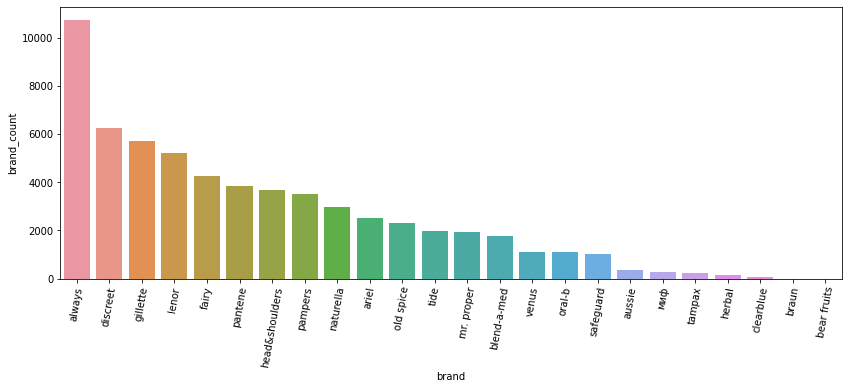

In [27]:
plt.figure(figsize=(14, 5))
sns.barplot(data=df_brand, x='brand', y='brand_count', 
                 order=df_brand.sort_values('brand_count', ascending=False)['brand'])
plt.xticks(rotation=80);

In [28]:
df_brand.sort_values('brand_count', ascending=False).head(3)

brand  brand_count
5     always        10737
8   discreet         6244
10  gillette         5718

In [29]:
# % от общих продаж
round(df_brand.sort_values('brand_count', ascending=False)['brand_count'].head(3) / df.shape[0] * 100, 1)

5     3.5
8     2.0
10    1.8
Name: brand_count, dtype: float64

In [30]:
df[df['brand'].str.contains('always') == True]['product_name'].value_counts().head()

always ежедневные прокладки удлиненные 16шт(proc    534
39124 alw.проклад.ultr.night duo 14шт               352
70526 alw.проклад.ultra super 16шт                  227
always platinum ultra прокладки ночные 6шт(прокт    208
always ultra прокладки normal/light 10шт(проктер    194
Name: product_name, dtype: int64

In [31]:
df[df['brand'].str.contains('discreet') == True]['product_name'].value_counts().head()

discreet deo ежедн прокладки waterlily 60 шт (пр    507
discreet deo ежедн прокладки waterli                503
2050868 discr.прокл.водн.лил.ежед. 60шт             413
2133901 discreet прокладки air ежед60шт             327
discreet deo ежедн прокладки water                  290
Name: product_name, dtype: int64

In [32]:
df[df['brand'].str.contains('gillette') == True]['product_name'].value_counts().head()

gillette mach3 кассеты д/станка 2шт (проктер):4/    220
gillette mach3 кассеты д/станка 4шт (проктер):4/    191
gillette пена д/бр д/чув200мл пена д/брлимон200м    120
gillette fusion кассеты д/станка 2шт (проктер):2    107
gillette mach3 кассеты д/станка 2шт                 100
Name: product_name, dtype: int64

In [33]:
print(df_brand['brand_count'].sum())
print(round(df_brand['brand_count'].sum() / df.shape[0] * 100, 1))

60971
19.7


## Ответ на задание 3

**a)**
Суммарно покупатели купили 60971 товар брендов, которые входят в P&G, что составляет 19,7% от всех купленных товаров.

**б)**
По популярности среди покупателей входят следующие ТОП-3 бренда:

1. always - 10737 продаж, или 3,5% от всех продаж
2. discreet - 6244 продаж, или 2% от всех продаж
3. gillette - 5718 продаж, или 1,8% от всех продаж

При чем always и discreet - бренды, которые продают преимущественно прокладки.